We will be using pyomnidata to retrieve omni data and plot for the support figures section

In [ ]:
import pyomnidata

#download all available data
pyomnidata.UpdateLocalData()

Downloading: omni_min1984.asc
[==================================================]
Converting to binary
[=============================================]
Saving
Saving file: 1/OMNI-1min-1984.bin
[##################################################]   89.5/  89.5 MiB (100.00%)
Done
Saved file: OMNI-1min-1984.bin
Downloading: omni_min1983.asc
[==================================================]
Converting to binary
[=============================================]
Saving
Saving file: 1/OMNI-1min-1983.bin
[##################################################]   89.2/  89.2 MiB (100.00%)
Done
Saved file: OMNI-1min-1983.bin
Downloading: omni_5min1994.asc
[==================================================]
Converting to binary
[================================================]
Saving
Saving file: 5/OMNI-5min-1994.bin
[##################################################]   19.0/  19.0 MiB (100.00%)
Done
Saved file: OMNI-5min-1994.bin
Downloading: omni_min2014.asc
[===================================

In [2]:
data = pyomnidata.GetOMNI(2022,Res=5)

File not found: 5/OMNI-5min-2022.bin


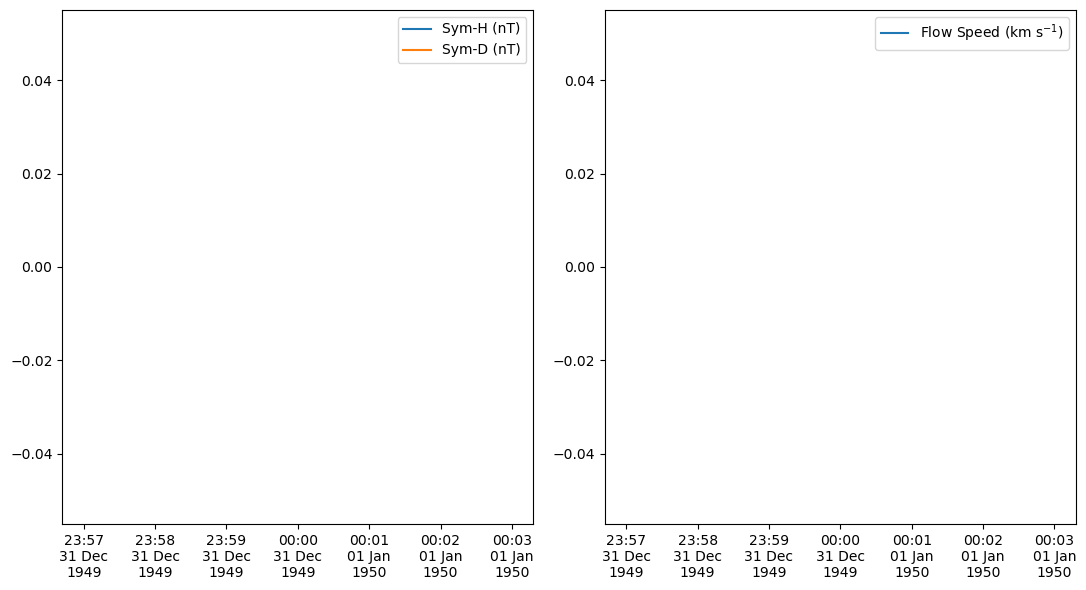

In [3]:
import matplotlib.pyplot as plt

#create a figure
plt.figure(figsize=(11,6))

#plot some stuff in one panel
ax0 = pyomnidata.PlotOMNI(['SymH','SymD'],[20220101,20220120],fig=plt,maps=[2,1,0,0])

#and a second panel
ax1 = pyomnidata.PlotOMNI(['FlowSpeed'],[20220101,20220120],fig=plt,maps=[2,1,1,0])

#fit things a bit nicer
plt.tight_layout()